In [2]:
import pandas as pd


# calculate varations

In [3]:
def add_variation_column(df, column_name):
    variations = [None]  # Initialize the list of variations with None for the first row
    for i in range(1, len(df)):
        diff = df[column_name].iloc[i] - df[column_name].iloc[i-1]
        variations.append(diff)
    df[f'variation_{column_name}'] = variations
    return df

# read the data from  data_kick.xlsx forme folder machine learning algorithem test
or use the file from dataset folder the varaiation is calculated

In [473]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\dataset\29.xlsx')


In [474]:
df[df['STATUS']==1].index

Int64Index([5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076,
            ...
            5178, 5179, 5180, 5181, 5182, 5183, 5184, 5185, 5186, 5187],
           dtype='int64', length=121)

In [475]:
cols11=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)']


In [476]:
data=df[cols11].copy()


In [477]:
for column_name in cols11:
    data=add_variation_column(data, column_name)

In [478]:
data=data.dropna()

In [479]:
df.shape

(16348, 47)

In [480]:
data['STATUS']=df['STATUS'][1:]

In [481]:
data.shape

(16347, 9)

In [103]:
data.head()

,TVA (m3),SPPA (kPa),MFOP ((m3/s)/(m3/s)),GASA (mol/mol),variation_TVA (m3),variation_SPPA (kPa),variation_MFOP ((m3/s)/(m3/s)),variation_GASA (mol/mol),STATUS
1,39.2,68.947573,0.05,0.0,0.0,-13.789515,0.0,0.0,0
2,39.2,68.947573,0.05,0.0,0.0,0.000000,0.0,0.0,0
3,39.1,68.947573,0.05,0.0,-0.1,0.000000,0.0,0.0,0
4,39.2,68.947573,0.05,0.0,0.1,0.000000,0.0,0.0,0
5,39.2,75.842330,0.05,0.0,0.0,6.894757,0.0,0.0,0


In [482]:
len(data[data['STATUS']==1].index)

121

In [483]:
data.columns

Index(['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)',
       'variation_TVA (m3)', 'variation_SPPA (kPa)',
       'variation_MFOP ((m3/s)/(m3/s))', 'variation_GASA (mol/mol)', 'STATUS'],
      dtype='object')

# rename the columns for column name issus

In [484]:
data = data.rename(columns={'variation_GASA (mol/mol)': 'variation_GASA'})
data = data.rename(columns={'variation_SPPA (kPa)':'variation_SPPA'})
data = data.rename(columns={'variation_MFOP ((m3/s)/(m3/s))': 'variation_MFOP'})
data = data.rename(columns={'variation_TVA (m3)': 'variation_TVA'})


In [485]:
cols0=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)','STATUS']


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

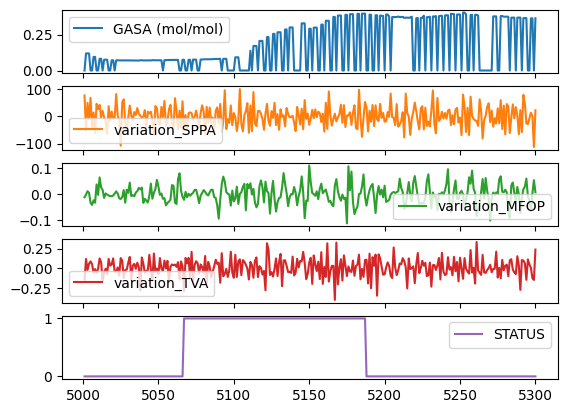

In [491]:
cols1=['GASA (mol/mol)','variation_SPPA','variation_MFOP','variation_TVA','STATUS']
data[cols1][5000:5300].plot(subplots=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

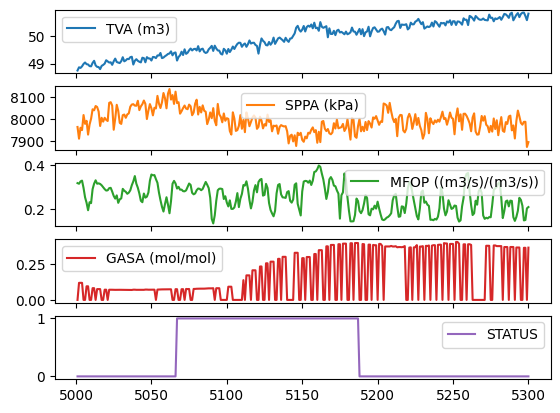

In [492]:
data[cols0][5000:5300].plot(subplots=True
                )



array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

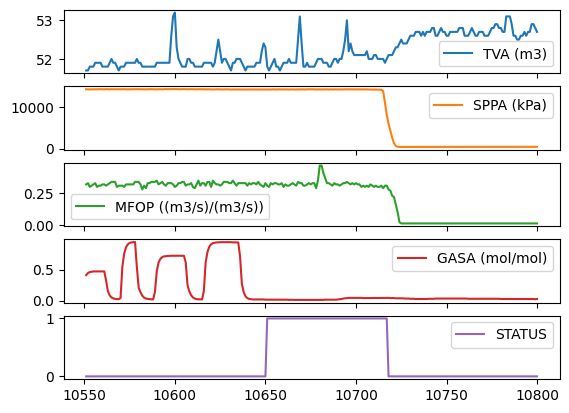

In [384]:
data[cols0][10550:10800].plot(subplots=True
                )

In [423]:
len(data[data['STATUS']==1].index)

67

# this the function we deal with

In [459]:
def feature_rep(window, thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop, p):
    # threshold for each feature mean of the feature when the kick is happen
    gasa = window['GASA (mol/mol)'].mean()
    tva = window['variation_TVA'].mean()
    spp = window['variation_SPPA'].mean()
    mfop = window['variation_MFOP'].mean()
# gasa pas de variasion
    detect_gasa, detect_spp, detect_tva, detect_mfop = False, False, False, False
    l = []
    if tva > thrsh_tva and mfop < thrsh_mfop and gasa > thrsh_gasa and spp<thrsh_spp:  # well 19
        l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
             int(mfop < thrsh_mfop), int(spp < thrsh_spp)]
    # elif tva > thrsh_tva and mfop < thrsh_mfop and gasa > thrsh_gasa:  # well 19
    #     l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
    #          int(mfop < thrsh_mfop), int(spp < thrsh_spp)]

    #     return 1, l
    # elif gasa > thrsh_gasa and tva > thrsh_tva and mfop < thrsh_mfop:  # well 17
    #     l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
    #          int(mfop < thrsh_mfop), int(spp < thrsh_spp)]

    #     return 1, l
    # elif gasa > thrsh_gasa and tva > thrsh_tva and spp < thrsh_spp:  # well 15
    #     l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
    #          int(mfop < thrsh_mfop), int(spp < thrsh_spp)]

    #     return 1, l
    # elif gasa > thrsh_gasa and mfop < thrsh_mfop and spp < thrsh_spp:  # well 6,8
    #     l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
    #          int(mfop < thrsh_mfop), int(spp < thrsh_spp)]

    #     return 1, l
    # elif gasa > thrsh_gasa and tva > thrsh_tva and mfop < thrsh_mfop and spp < thrsh_spp:  # well 26
    #     l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
    #          int(mfop < thrsh_mfop), int(spp < thrsh_spp)]
    #     return 1, l
    else:

        l = [int(gasa > thrsh_gasa), int(tva > thrsh_tva),
             int(mfop < thrsh_mfop), int(spp < thrsh_spp)]
        return 0, l

In [468]:
data['kick_recognition']=111
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =1, 0.035, 0.1, 0#well 6,8
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0, 0.03, 0, 0.1#well 26
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0.015, 0.08, -1, 0#15
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0.001, 0.03, -1, 0#17
thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =0.01, 0.03, -0.08,0#19
window_size = 180
window_size = window_size//5
positive=0
train_data=[]
d=[]
for i in range(len(data)-window_size+1):
    p=False
    window = data.iloc[i:i+window_size]
    
    data['kick_recognition'][i:i+window_size+1],b = feature_rep(
        window, thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop, p)
    
    b.append(data.iloc[i,-1:][0]) #append df[kick_recognitin][i]
    train_data.append(b)
        
    # if window['kick_recognition'].sum()>0 and window['STATUS'].sum()>0:
    #     positive+=1

C:\Users\hp\AppData\Local\Temp\ipykernel_6220\879121073.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kick_recognition'][i:i+window_size+1],b = feature_rep(


# calculate the accuracy

In [469]:

ACC = sum((data['STATUS'] == data['kick_recognition'])) / \
    data.shape[0]  # calculate accuracy of algorithm
data_kik = data[data['STATUS'] == 1]  # for get just where status=1
statu_acc = sum((data_kik['STATUS'] == data_kik['kick_recognition']))/data_kik.shape[0]
print('accuracy: ', ACC, 'accuracy status', statu_acc)

accuracy:  0.9955939474752159 accuracy status 0.417910447761194


# convert train data for plot issus

In [470]:
cols=['GASA (mol/mol)','TVA (m3)','MFOP ((m3/s)/(m3/s))', 'SPPA (kPa)' ,
       'detection de kick']
dftest = pd.DataFrame(train_data, columns=cols)
dftest['STATUS']=data['STATUS']
dftest['detection de kick'].value_counts()

0.0    17149
1.0       65
Name: detection de kick, dtype: int64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

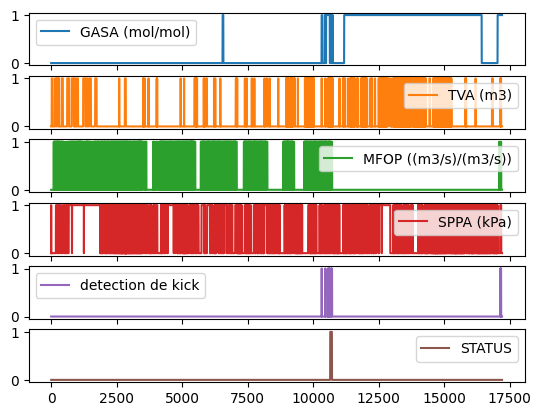

In [471]:
dftest.plot(subplots=True)

<Axes: >

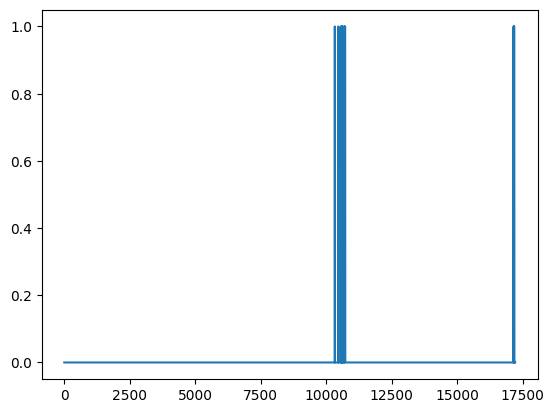

In [472]:
dftest['detection de kick'].

array([0., 1.])

In [43]:
dftes=dftest
dftes.shape

(17244, 6)

In [44]:
dftes=dftes.drop_duplicates()

In [45]:
dftes.shape

(28, 6)

In [85]:
data[data['kick_recognition']==1].index

Int64Index([  610,   611,   612,   613,   666,   667,   668,   669,   670,
              671,
            ...
            53152, 53153, 53154, 53164, 53168, 53169, 53170, 53171, 53196,
            53197],
           dtype='int64', length=7131)

array([<Axes: >, <Axes: >], dtype=object)

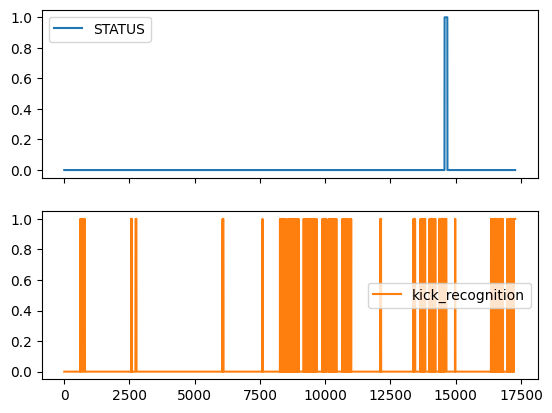

In [168]:
data[['STATUS','kick_recognition']].plot(subplots=True)